<h1>2022.03.24. 강의 시간내 실습</h1>

<h2>Dataset 로드 및 내용 확인</h2>

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
from sklearn.datasets import load_linnerud

In [165]:
linnerud = load_linnerud()

In [166]:
print(linnerud.target_names)

['Weight', 'Waist', 'Pulse']


In [167]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [168]:
df = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [169]:
df_target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [170]:
data = pd.concat([df, df_target], axis=1)

In [171]:
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [172]:
data.drop(columns=['Weight', 'Waist'], inplace=True)

In [173]:
data.columns

Index(['Chins', 'Situps', 'Jumps', 'Pulse'], dtype='object')

In [174]:
data.shape

(20, 4)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Pulse   20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


In [176]:
data['Pulse'] = linnerud.target

In [177]:
data.head()

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0


<h2>EDA</h2>

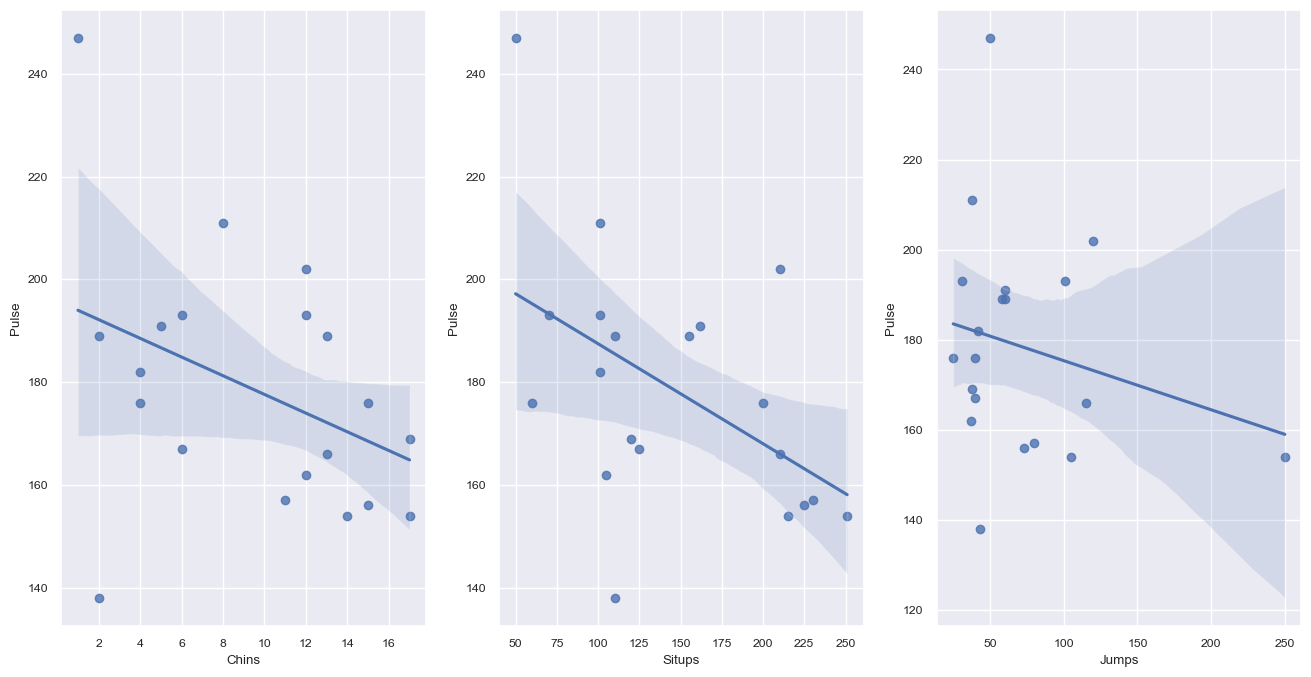

In [178]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=3)

lm_features = ['Chins', 'Situps', 'Jumps']

for i, feature in enumerate(lm_features):
    sns.regplot(x=feature, y='Pulse', data=data, ax=axs[i])

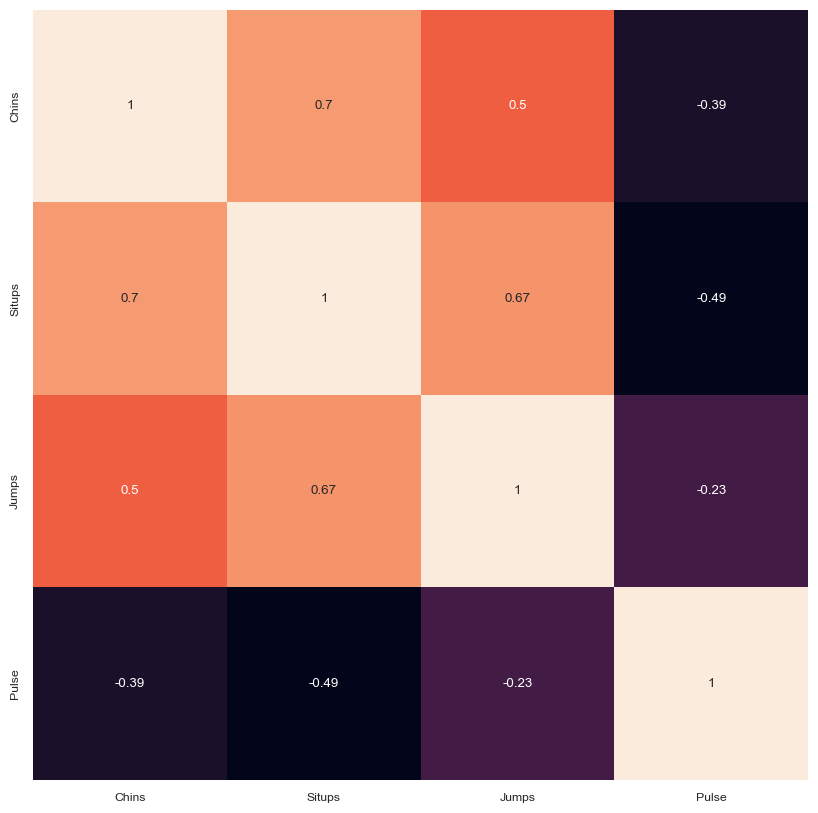

In [179]:
df_corr=data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
from sklearn.model_selection import train_test_split

x_data=data.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=data.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [182]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [183]:
y_train.head()

14    193.0
16    176.0
10    169.0
8     176.0
5     182.0
Name: Pulse, dtype: float64

In [184]:
lr = LinearRegression()

In [185]:
lr.fit(X_train, y_train)

LinearRegression()

In [186]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) 
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [-1.  -0.1  0.2]
상수항(절편): 200.7


In [187]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [188]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1559.793, RMSE: 39.494
Variance score : 0.115


In [189]:
print("절편 값:", lr.intercept_)

print("회귀계수:", np.round(lr.coef_,1))

절편 값: 200.65050193110943
회귀계수: [-1.  -0.1  0.2]


<h2>Evaluate Model</h2>

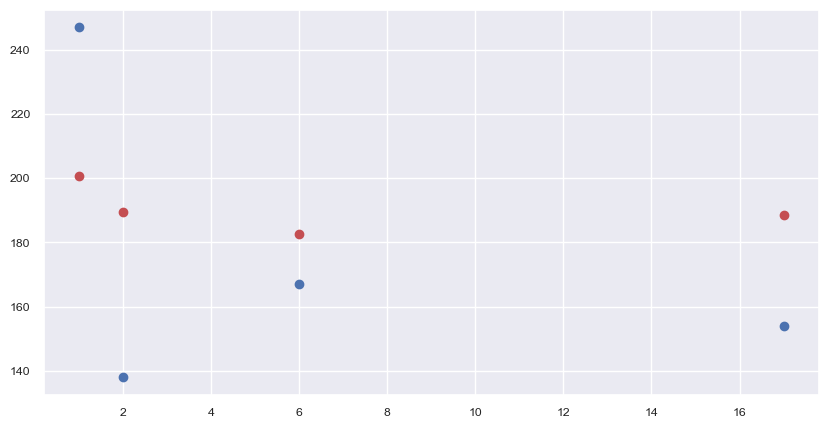

In [190]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

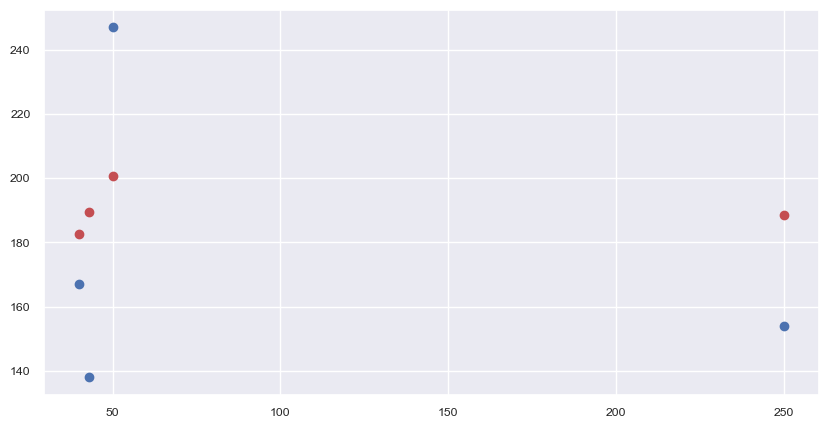

In [191]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_test_pred, c='r', label='y_pred')
plt.show()   

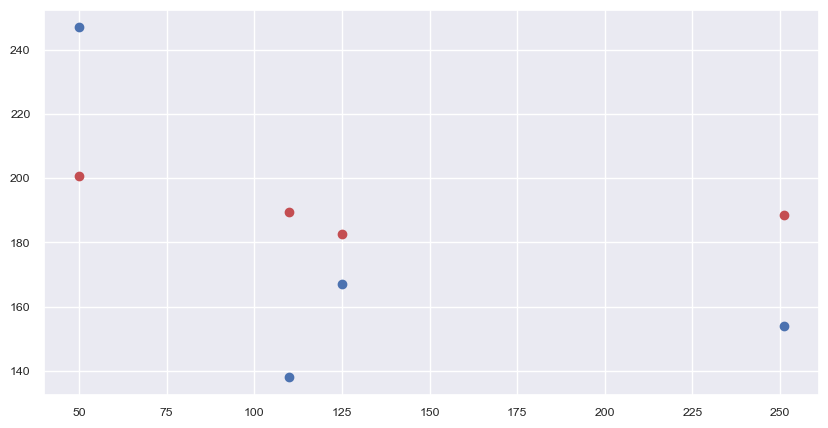

In [192]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
plt.show()   